In [1]:

#from functools import reduce
import warnings
import os
import pandas as pd
import numpy as np
#import geopandas as gpd
#from shapely.geometry import MultiLineString
#from shapely import wkt
import json
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from pandas.errors import SettingWithCopyWarning
import os

import seaborn as sns
#import pyarrow.parquet as pq
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
#warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import dates
#import plotly.express as px
#import shapely
#from shapely.geometry import LineString, Point,Polygon


#warnings.simplefilter(action='ignore', category=FutureWarning)
#import pyspark

In [2]:
RDS_labels=pd.read_csv('../datasets/RDS_labels.csv')


In [3]:
RDS_speeds=pd.read_csv('../datasets/rds.csv')

In [4]:
RDS_speeds

,DateTime,1415,1467,1468,1517,1569,1570,1622,1623,1679,1737
0,2023-05-01 00:00:30,65.669398,67.421846,69.715050,78.493354,70.567109,63.004109,70.883251,69.287061,75.951694,78.247133
1,2023-05-01 00:01:00,63.993724,67.824507,68.912114,72.945893,70.631738,69.604466,63.731343,73.000000,75.322442,75.754216
2,2023-05-01 00:01:30,68.272995,67.132558,69.614846,74.577389,73.715642,66.374735,74.458287,77.173493,66.315789,75.175209
3,2023-05-01 00:02:00,72.141176,65.961202,71.792289,73.047732,70.525637,68.361590,66.866469,74.251500,78.637066,65.975477
4,2023-05-01 00:02:30,66.682800,68.286460,73.197255,70.337388,74.848917,67.484033,76.153968,71.034160,72.960000,79.094036
...,...,...,...,...,...,...,...,...,...,...,...
348076,2023-08-31 23:57:30,67.552465,63.932942,66.694821,73.798153,66.878737,60.610909,76.095737,71.973004,71.357691,73.313912
348077,2023-08-31 23:58:00,68.963553,66.363974,62.894039,73.707059,68.402409,64.990782,73.719165,71.270523,76.772322,76.790857
348078,2023-08-31 23:58:30,68.437217,58.958098,69.322786,72.241440,72.076699,65.291032,72.130739,71.071746,71.613883,75.983713
348079,2023-08-31 23:59:00,67.177381,66.427753,72.946070,70.415340,71.035504,64.721160,71.560660,74.121728,73.171376,72.995323


In [5]:
RDS_labels=pd.merge(RDS_speeds,RDS_labels[['DateTime','crash_utc']],on='DateTime')

In [6]:
RDS_densities=pd.read_csv('../log/test/CANF_rds/densities.csv')

In [7]:
RDS_densities

,Unnamed: 0,loss,label,start
0,0,-1.877620,0,2023-08-06 19:51:30
1,1,-2.095184,0,2023-08-06 19:53:00
2,2,-1.909999,0,2023-08-06 19:54:30
3,3,-1.949939,0,2023-08-06 19:56:00
4,4,-1.958104,0,2023-08-06 19:57:30
...,...,...,...,...
23200,23200,-1.924755,0,2023-08-31 23:51:30
23201,23201,-1.811023,0,2023-08-31 23:53:00
23202,23202,-1.750318,0,2023-08-31 23:54:30
23203,23203,-1.794505,0,2023-08-31 23:56:00


In [8]:
RDS_labels['DateTime'] = pd.to_datetime(RDS_labels['DateTime'])
RDS_densities['start'] = pd.to_datetime(RDS_densities['start'])

In [9]:
pd.merge_asof(RDS_labels[RDS_labels.DateTime>=RDS_densities.start.min()],RDS_densities, left_on='DateTime',right_on='start', direction="backward",tolerance=pd.Timedelta(seconds=60))

,DateTime,1415,1467,1468,1517,1569,1570,1622,1623,1679,1737,crash_utc,Unnamed: 0,loss,label,start
0,2023-08-06 19:51:30,67.332024,65.070466,70.197824,73.907238,73.526842,67.654650,71.873016,75.724663,70.812047,75.875063,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
1,2023-08-06 19:52:00,67.568628,67.975960,71.601339,76.886795,74.350945,67.151147,73.872609,73.737264,69.660510,70.787266,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
2,2023-08-06 19:52:30,67.512798,65.956407,70.081378,73.314165,71.449760,70.627302,76.061920,76.603893,71.366661,72.085481,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
3,2023-08-06 19:53:00,65.402022,63.953097,69.329357,73.499793,70.437475,72.407075,77.040453,74.081433,76.393147,73.832028,0,1.0,-2.095184,0.0,2023-08-06 19:53:00
4,2023-08-06 19:53:30,71.447369,62.758994,69.174088,72.110989,81.039286,63.247261,76.523666,76.186916,75.158776,75.030684,0,1.0,-2.095184,0.0,2023-08-06 19:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69612,2023-08-31 23:57:30,67.552465,63.932942,66.694821,73.798153,66.878737,60.610909,76.095737,71.973004,71.357691,73.313912,0,23204.0,-1.813523,0.0,2023-08-31 23:57:30
69613,2023-08-31 23:58:00,68.963553,66.363974,62.894039,73.707059,68.402409,64.990782,73.719165,71.270523,76.772322,76.790857,0,23204.0,-1.813523,0.0,2023-08-31 23:57:30
69614,2023-08-31 23:58:30,68.437217,58.958098,69.322786,72.241440,72.076699,65.291032,72.130739,71.071746,71.613883,75.983713,0,23204.0,-1.813523,0.0,2023-08-31 23:57:30
69615,2023-08-31 23:59:00,67.177381,66.427753,72.946070,70.415340,71.035504,64.721160,71.560660,74.121728,73.171376,72.995323,0,NaN,NaN,NaN,NaT


In [10]:
merged_results=pd.merge_asof(RDS_labels[RDS_labels.DateTime>=RDS_densities.start.min()],RDS_densities, left_on='DateTime',right_on='start', direction="backward",tolerance=pd.Timedelta(seconds=60)).dropna(subset=[	'loss',	'label',	'start'])
merged_results

,DateTime,1415,1467,1468,1517,1569,1570,1622,1623,1679,1737,crash_utc,Unnamed: 0,loss,label,start
0,2023-08-06 19:51:30,67.332024,65.070466,70.197824,73.907238,73.526842,67.654650,71.873016,75.724663,70.812047,75.875063,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
1,2023-08-06 19:52:00,67.568628,67.975960,71.601339,76.886795,74.350945,67.151147,73.872609,73.737264,69.660510,70.787266,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
2,2023-08-06 19:52:30,67.512798,65.956407,70.081378,73.314165,71.449760,70.627302,76.061920,76.603893,71.366661,72.085481,0,0.0,-1.877620,0.0,2023-08-06 19:51:30
3,2023-08-06 19:53:00,65.402022,63.953097,69.329357,73.499793,70.437475,72.407075,77.040453,74.081433,76.393147,73.832028,0,1.0,-2.095184,0.0,2023-08-06 19:53:00
4,2023-08-06 19:53:30,71.447369,62.758994,69.174088,72.110989,81.039286,63.247261,76.523666,76.186916,75.158776,75.030684,0,1.0,-2.095184,0.0,2023-08-06 19:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69610,2023-08-31 23:56:30,69.390661,64.973166,69.331405,71.146644,67.641081,62.135767,73.929155,73.380460,77.197401,74.833411,0,23203.0,-1.794505,0.0,2023-08-31 23:56:00
69611,2023-08-31 23:57:00,66.994097,64.774003,70.033669,72.192548,68.036419,66.134541,74.023666,77.599254,73.134595,73.922146,0,23203.0,-1.794505,0.0,2023-08-31 23:56:00
69612,2023-08-31 23:57:30,67.552465,63.932942,66.694821,73.798153,66.878737,60.610909,76.095737,71.973004,71.357691,73.313912,0,23204.0,-1.813523,0.0,2023-08-31 23:57:30
69613,2023-08-31 23:58:00,68.963553,66.363974,62.894039,73.707059,68.402409,64.990782,73.719165,71.270523,76.772322,76.790857,0,23204.0,-1.813523,0.0,2023-08-31 23:57:30


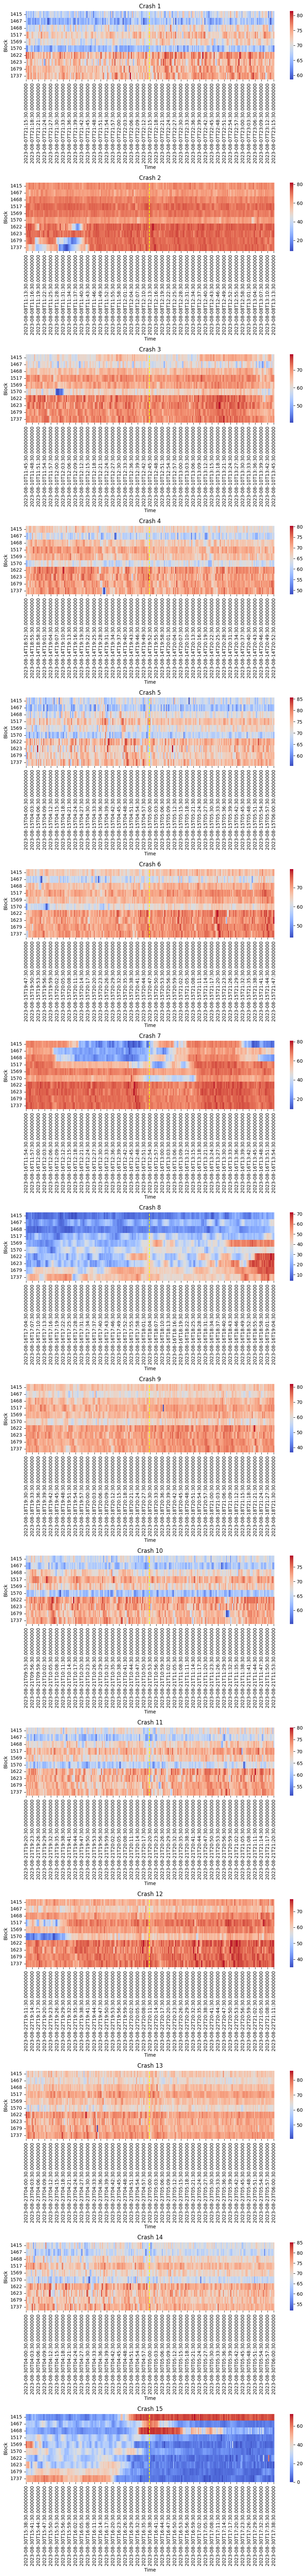

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Filter the DataFrame to get rows where crash=1
crash_data = merged_results[merged_results['crash_utc'] == 1]

# Define the time window for plotting (1 hour before and after)
time_window = timedelta(hours=1)

# Create a figure and axis for the plots
fig, axes = plt.subplots(nrows=len(crash_data), figsize=(10, 5 * len(crash_data)))


# Loop through each crash and plot the corresponding heatmap
for i, crash_row in enumerate(crash_data.iterrows()):
    crash_index, crash_row_data = crash_row
    crash_datetime = crash_row_data['DateTime']

    
    # Define the time range for the plot
    start_time = crash_datetime - time_window
    end_time = crash_datetime + time_window
    
    # Filter data within the time range
    data_within_window = merged_results[(merged_results['DateTime'] >= start_time) & (merged_results['DateTime'] <= end_time)]
    
    # Make sure the DateTime column is set as index
    

    # Reshape the data for the heatmap
    heatmap_data = data_within_window[list(merged_results.columns)[:11]].set_index('DateTime')  # Replace with the actual column names
    
    # Plot the heatmap
    sns.heatmap(heatmap_data.T, ax=axes[i], cmap='coolwarm', annot=False, cbar=True)
    

    # axes[i].axvline(x=crash_datetime, color='yellow', linestyle='--', label='Crash Time')
    if crash_datetime in heatmap_data.index:
        crash_time_position = heatmap_data.index.get_loc(crash_datetime)
        # Mark the crash time on the heatmap using the relative position
        axes[i].axvline(x=crash_time_position, color='yellow', linestyle='--', label='Crash Time')
    else:
        print(f"Crash time {crash_datetime} is not within the plotted range for crash {i+1}")
    
    # Set labels and title
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Block')
    axes[i].set_title(f'Crash {i+1}')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('../figures/Speed Heatmaps.png')
plt.show()


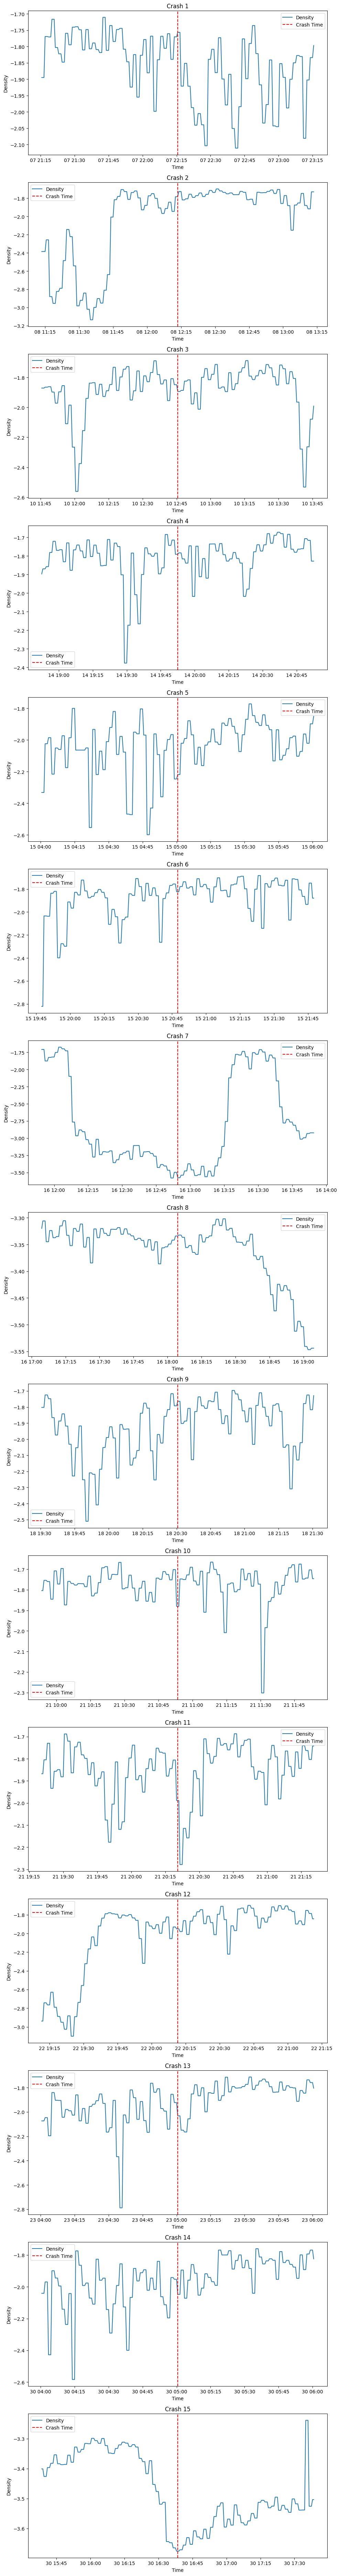

In [12]:
from datetime import timedelta
# Filter the DataFrame to get rows where crash=1
crash_data = merged_results[merged_results['crash_utc'] == 1]

# Define the time window for plotting (1 hour before and after)
time_window = timedelta(hours=1)

# Create a figure and axis for the plots
fig, axes = plt.subplots(nrows=len(crash_data), figsize=(10, 5 * len(crash_data)))

# Loop through each crash and plot the corresponding data
for i, crash_row in enumerate(crash_data.iterrows()):
    crash_index, crash_row_data = crash_row
    crash_datetime = crash_row_data['DateTime']
    
    # Define the time range for the plot
    start_time = crash_datetime - time_window
    end_time = crash_datetime + time_window
    
    # Filter data within the time range
    data_within_window = merged_results[(merged_results['DateTime'] >= start_time) & (merged_results['DateTime'] <= end_time)]
    
    # Plot the data
    axes[i].plot(data_within_window['DateTime'], data_within_window['loss'], label='Density')
    axes[i].axvline(x=crash_datetime, color='red', linestyle='--', label='Crash Time')
    
    # Add labels and legend
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Crash {i+1}')
    axes[i].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('../figures/Log Densities.png')
plt.show()